# Forecasting Life Expectancy
## INFSCI 2415: Information Visualization Midterm Project
## Vishruth Reddy
### vpr8@pitt.edu

* Data for the project is obtained from Kaggle.
* Link to the dataset: "https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated/data"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("Life-Expectancy-Data-Updated.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [4]:
df.isna().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

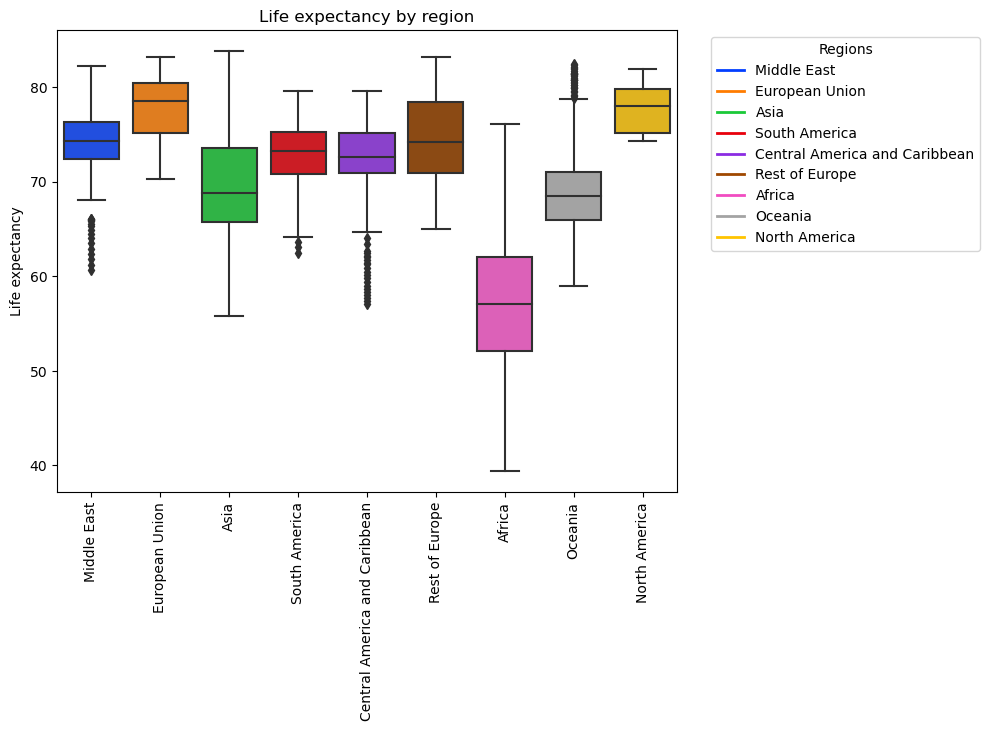

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=df, x='Region', y='Life_expectancy', palette='bright', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_xlabel(None)
ax.set_ylabel("Life expectancy")
ax.set_title("Life expectancy by region")

legend_elements = [plt.Line2D([0],[0], color=sns.color_palette('bright')[i], lw=2, label=region)
                   for i, region in enumerate(df['Region'].unique())]
ax.legend(handles=legend_elements, title="Regions", loc="upper right", bbox_to_anchor=(1.5, 1))

plt.show()


The above `box plots (or box-and-whisker plots)` are a graphical representation of my dataset's summary statistics.
The above boxplot shows the life expectancy of the people in various continents.
* `Middle East`, `South America`, `Central America`, and `Oceania` have `outliers`.
* `Africa` has the `widest and the lowest range` of life expectancy whereas, `North America` has the `narrowest and the highest range` of life expectancy compared to the other regions.
* The legend on the side displays the color used to represent each region in the boxplots.

**About the boxplots:**

**1. Box**: The central part of the plot is a rectangular box. The box represents the interquartile range (IQR), which includes the middle 50% of the data. The bottom and top of the box mark the first quartile (Q1) and third quartile (Q3), respectively. The width of the box shows the spread of the data within this middle 50%.
- **Q1 (First Quartile)**: The 25th percentile of the data, i.e., the value below which 25% of the data falls.
- **Q3 (Third Quartile)**: The 75th percentile of the data, i.e., the value below which 75% of the data falls.
- **IQR (Interquartile Range)**: The range between Q1 and Q3, representing the middle 50% of the data.

**2. Median**: A vertical line or marker inside the box represents the median (Q2) of the data, which is the middle value when the data is sorted.
- **Q2 (Median)**: The middle value of the data set.

**3. Whiskers**: Lines extending from the top and bottom of the box, indicate the range of the data.
- **Whisker Range**: The range between the whiskers, which typically covers the entire data range if `whis` is set to `[0, 100]`.

**4. Outliers**: Any data points outside the whiskers are considered outliers and are usually plotted as individual points. Outliers are values that are significantly different from the rest of the data and can provide insights into data anomalies.